## General network properties: Size as number of nodes and links

In [1]:
import pandas as pd
import seaborn as sns
from pathlib import Path
import os
import config
import dataframe_image as dfi
from config import LEVELS, INTERACTOMES_PATH, DATA_REACTOME_PATH, PATHWAY_GRAPHS_PATH
from lib.networks import get_interactomes, get_combinations, get_combinations_with_pathways
from lib.networks import get_multiindex
from lib.networks import get_sizes

%load_ext autoreload
%autoreload 2
%reload_ext autoreload

config.set_root_wd()

Initial working directory: C:\git\ProteoformNetworks\src\Python
New working directory: c:\git\ProteoformNetworks


In [2]:
interactomes_no_sm, interactomes_with_sm, interactomes_with_unique_sm = get_interactomes(DATA_REACTOME_PATH, INTERACTOMES_PATH)
interactomes = [*interactomes_no_sm.values(), *interactomes_with_sm.values(), *interactomes_with_unique_sm.values()]

Reading participants of all reactions for level genes...
Quering participants of all reactions for level proteins...


KeyboardInterrupt: 

In [ ]:
index = get_multiindex()
num_interactions, num_entities, num_small_molecules = get_sizes(interactomes, index)
num_interactions

Small Molecules           Entity Level
Not Included              genes            365068
                          proteins         374362
                          proteoforms      590204
Included                  genes            451221
                          proteins         461128
                          proteoforms      682711
Reaction-Unique Included  genes            808025
                          proteins         822205
                          proteoforms     1047807
dtype: int64

In [ ]:
# Calculate number of nodes of each type
df_sizes = pd.DataFrame({
    "Interactions": num_interactions,
    "Accessioned Entities": num_entities,
    "Small Molecules": num_small_molecules
}, index=index)
df_sizes.columns.name = "Sizes"
dfi.export(df_sizes, 'figures/interactome_num_nodes_by_type.png')
df_sizes

Sizes                                  Interactions  Accessioned Entities  \
Small Molecules          Entity Level                                       
Not Included             genes               365068                 10966   
                         proteins            374362                 11064   
                         proteoforms         590204                 14340   
Included                 genes               451221                 10966   
                         proteins            461128                 11064   
                         proteoforms         682711                 14340   
Reaction-Unique Included genes               808025                 10966   
                         proteins            822205                 11064   
                         proteoforms        1047807                 14340   

Sizes                                  Small Molecules  
Small Molecules          Entity Level                   
Not Included             genes                       0  
                         proteins                    0  
                         proteoforms                 0  
Included                 genes                    2087  
                         proteins                 2087  
                         proteoforms              2087  
Reaction-Unique Included genes                   29561  
                         proteins                29561  
                         proteoforms             29561

In [ ]:
# Create a list with the number of genes, proteins, proteoforms, small molecules
num_nodes = [*df_sizes.loc[['Not Included']]["Accessioned Entities"], df_sizes.loc[['Included']]["Small Molecules"][0]]

# Create list with all levels:
node_types = [*LEVELS, "small molecules"]

# Create a list with the number of interactions without the small molecules
num_interactions_no_sm = df_sizes.loc[['Not Included']]["Interactions"]

num_interactions_with_sm = df_sizes.loc[['Included']]["Interactions"]

maxy = max([*num_interactions_with_sm, *num_interactions_no_sm])

maxy = 800000

C:\Users\luisp\AppData\Local\Temp\ipykernel_15404\703382627.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot2.set_xticklabels(LEVELS, rotation=45)
C:\Users\luisp\AppData\Local\Temp\ipykernel_15404\703382627.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot3.set_xticklabels(LEVELS, rotation=45)


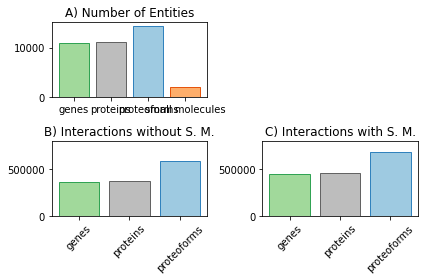

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from config import COLORS_BORDER

figure, axis = plt.subplots(1, 4)
# Placing the plots in the plane
plot1 = plt.subplot2grid((2, 2), (0, 0), rowspan=1, colspan=1)
plot2 = plt.subplot2grid((2, 2), (1, 0), rowspan=1, colspan=1)
plot3 = plt.subplot2grid((2, 2), (1, 1), rowspan=1, colspan=1)

# Plot number of nodes
plot1.bar(node_types, num_nodes, color=config.COLORS_FILL, edgecolor=COLORS_BORDER)
plot1.set_title('A) Number of Entities')

plt.xticks(rotation=90)

# Plot number of interactions without small molecules
plot2.bar(LEVELS, num_interactions_no_sm, color=config.COLORS_FILL, edgecolor=COLORS_BORDER)
plot2.set_title('B) Interactions without S. M.')
plot2.set_ylim([0, maxy])
plot2.set_xticklabels(LEVELS, rotation=45)

# Plot number of interactions with small molecules
plot3.bar(LEVELS, num_interactions_with_sm, color=config.COLORS_FILL, edgecolor=COLORS_BORDER)
plot3.set_title('C) Interactions with S. M.')
plot3.set_ylim([0, maxy])
plot3.set_xticklabels(LEVELS, rotation=45)

# Packing all the plots and displaying them
plt.tight_layout()
plt.show()

figure.savefig('figures/figure_4.png')
plt.close()

In [ ]:
from lib.networks import get_increase_percentage
from config import genes, proteins, proteoforms

increase = get_increase_percentage(interactomes_no_sm[genes].number_of_nodes(),
                                   interactomes_no_sm[proteins].number_of_nodes())
print(f"There are {increase} % more nodes in the protein interactome than in the gene interactome.")

increase = get_increase_percentage(interactomes_no_sm[genes].number_of_edges(),
                                   interactomes_no_sm[proteins].number_of_edges())
print(f"There are {increase} % more interactions in the protein interactome than in the gene interactome.")

increase = get_increase_percentage(interactomes_no_sm[proteins].number_of_nodes(),
                                   interactomes_no_sm[proteoforms].number_of_nodes())
print(f"There are {increase} % more nodes in the proteoform interactome than in the protein interactome.")

increase = get_increase_percentage(interactomes_no_sm[proteins].number_of_edges(),
                                   interactomes_no_sm[proteoforms].number_of_edges())
print(f"There are {increase} % more interactions in the proteoform interactome than in the protein interactome.")

There are 0.89 % more nodes in the protein interactome than in the gene interactome.
There are 2.48 % more interactions in the protein interactome than in the gene interactome.
There are 22.85 % more nodes in the proteoform interactome than in the protein interactome.
There are 36.57 % more interactions in the proteoform interactome than in the protein interactome.


In [ ]:
for l in LEVELS:
    increase_generic = get_increase_percentage(
        interactomes_no_sm[l].number_of_nodes(),
        interactomes_with_sm[l].number_of_nodes()
    )
    print(f"In the {l} network, there is an increase of {increase_generic} % more nodes when adding generic small molecules")
    increase_unique = get_increase_percentage(
        interactomes_no_sm[l].number_of_nodes(),
        interactomes_with_unique_sm[l].number_of_nodes()
    )
    print(f"In the {l} network, there is an increase of {increase_unique} % more nodes when adding reaction-unique small molecules")

increase_with_generic_sm = [get_increase_percentage(
        interactomes_no_sm[l].number_of_nodes(),
        interactomes_with_sm[l].number_of_nodes()
    ) for l in LEVELS]
percentage_generic_sm = [
    (interactomes_with_sm[l].number_of_nodes() - interactomes_no_sm[l].number_of_nodes()) / interactomes_with_sm[l].number_of_nodes()
    for l in LEVELS]
increase_with_unique_sm = [get_increase_percentage(
        interactomes_no_sm[l].number_of_nodes(),
        interactomes_with_unique_sm[l].number_of_nodes()
    ) for l in LEVELS]
percentage_unique_sm = [
    (interactomes_with_unique_sm[l].number_of_nodes() - interactomes_no_sm[l].number_of_nodes()) / interactomes_with_unique_sm[l].number_of_nodes()
    for l in LEVELS]

d = {
    "Increase of nodes with generic small molecules": increase_with_generic_sm,
    "Percentage of generic small molecule nodes": percentage_generic_sm,
    "Increase of nodes with unique small molecules": increase_with_unique_sm,
    "Percentage of unique small molecule nodes ": percentage_unique_sm
}

df_increase_sm = pd.DataFrame(data=d, index=LEVELS)
dfi.export(df_increase_sm, 'figures/interactome_size_increase.png')
df_increase_sm


In the genes network, there is an increase of 15.99 % more nodes when adding generic small molecules
In the genes network, there is an increase of 72.94 % more nodes when adding reaction-unique small molecules
In the proteins network, there is an increase of 15.87 % more nodes when adding generic small molecules
In the proteins network, there is an increase of 72.77 % more nodes when adding reaction-unique small molecules
In the proteoforms network, there is an increase of 12.7 % more nodes when adding generic small molecules
In the proteoforms network, there is an increase of 67.34 % more nodes when adding reaction-unique small molecules


,Increase of nodes with generic small molecules,Percentage of generic small molecule nodes,Increase of nodes with unique small molecules,Percentage of unique small molecule nodes
genes,15.99,0.16,72.94,0.73
proteins,15.87,0.16,72.77,0.73
proteoforms,12.70,0.13,67.34,0.67


In [ ]:
from statistics import mean
from lib.dictionaries import read_dictionary_one_to_set

map_genes_to_proteins = read_dictionary_one_to_set(INTERACTOMES_PATH, "mapping_proteins_to_genes.tsv",
                                                   col_indices=(1, 0))
print(f"There are {len(map_genes_to_proteins.keys())} genes in the map.")

avg_proteins_per_gene = round(mean([len(map_genes_to_proteins[key]) for key in map_genes_to_proteins.keys()]), 2)
print(f"The average number of proteins per gene is {avg_proteins_per_gene}")

There are 10966 genes in the map.
The average number of proteins per gene is 1.01


In [ ]:
map_proteins_to_proteoforms = read_dictionary_one_to_set(INTERACTOMES_PATH, "mapping_proteins_to_proteoforms.tsv",
                                                         col_indices=(0, 1))
print(f"There are {len(map_proteins_to_proteoforms.keys())} proteins in the map.")

avg_proteoforms_per_protein = round(
    mean([len(map_proteins_to_proteoforms[key]) for key in map_proteins_to_proteoforms.keys()]), 2)
print(f"The average number of proteoforms per protein is {avg_proteoforms_per_protein}")

There are 11064 proteins in the map.
The average number of proteoforms per protein is 1.3
